**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [5]:
fdiry = file.path(FD_RES, "source", "MPRA", "MPRA_LentiMPRA_K562_Nadav")
dir(fdiry)

[1] "ENCFF012HZW.bigBed" "ENCFF348WYK.bed.gz" "ENCFF616IAQ.tsv"

In [41]:
fdiry = file.path(FD_RES, "source", "MPRA", "MPRA_LentiMPRA_K562_Nadav")
fname = "ENCFF616IAQ.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_lmpra_score = dat
print(dim(dat))
head(dat)

Rows: 226946 Columns: 2
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): name
dbl (1): meanVal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 226946      2


name,meanVal
<chr>,<dbl>
BCL11A_1,-0.2093
BCL11A_10,-0.4507
BCL11A_1003_Reversed:,-0.0176
BCL11A_1005,-0.4406
BCL11A_1005_Reversed:,-0.3736
BCL11A_1007,0.0489


In [18]:
fdiry = file.path(FD_RES, "source", "MPRA", "MPRA_LentiMPRA_K562_Nadav")
fname = "ENCFF348WYK.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Name", "Score", "Strand")
dat = read_tsv(fpath, col_names=FALSE)

dat_lmpra_import = dat
print(dim(dat))
head(dat)

Rows: 226631 Columns: 11
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): X1, X4, X6
dbl (8): X2, X3, X5, X7, X8, X9, X10, X11

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 226631     11


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,115631,115831,peak1_Reversed:,0,-,0.1572,0.0780,0.0735,-1,-1
chr1,138940,139140,peak2_Reversed:,0,-,0.2047,0.0510,0.0490,-1,-1
chr1,138940,139140,peak2,0,+,-0.2317,0.0790,0.0562,-1,-1
chr1,203225,203425,peak3_Reversed:,0,-,0.0023,0.0768,0.0643,-1,-1
chr1,203225,203425,peak3,0,+,0.0524,0.0834,0.0721,-1,-1
chr1,267911,268111,peak4_Reversed:,0,-,-0.3220,0.0529,0.0352,-1,-1


In [29]:
dat = dat_lmpra_import
dat = dat[,c("X5", "X7", "X8", "X9", "X10", "X11")]
summary(dat)

       X5          X7                X8                X9               X10    
 Min.   :0   Min.   :-1.8879   Min.   :0.00770   Min.   :0.01120   Min.   :-1  
 1st Qu.:0   1st Qu.:-0.2593   1st Qu.:0.04970   1st Qu.:0.04230   1st Qu.:-1  
 Median :0   Median :-0.0004   Median :0.06900   Median :0.05710   Median :-1  
 Mean   :0   Mean   : 0.1042   Mean   :0.07148   Mean   :0.06703   Mean   :-1  
 3rd Qu.:0   3rd Qu.: 0.3718   3rd Qu.:0.08970   3rd Qu.:0.07750   3rd Qu.:-1  
 Max.   :0   Max.   : 3.7401   Max.   :0.40040   Max.   :0.91510   Max.   :-1  
      X11    
 Min.   :-1  
 1st Qu.:-1  
 Median :-1  
 Mean   :-1  
 3rd Qu.:-1  
 Max.   :-1  

In [30]:
dat = dat_lmpra_import
vec = dat$X8
print(head(vec))

p_adjust_methods = p.adjust.methods[p.adjust.methods != "fdr"]

for (meth in p_adjust_methods){
    cat(meth, "\n")
    tmp = p.adjust(vec, method="fdr")
    print(head(tmp))
}


[1] 0.0780 0.0510 0.0790 0.0768 0.0834 0.0529
holm 
[1] 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248
hochberg 
[1] 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248
hommel 
[1] 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248
bonferroni 
[1] 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248
BH 
[1] 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248
BY 
[1] 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248
none 
[1] 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248 0.1174248


In [34]:
dat = dat_lmpra_import
vec1 = dat$X8
vec2 = dat$X9
vec3 = log2(vec1) -  log2(vec2)
print(head(vec1))
print(head(vec2))
print(head(vec3))

[1] 0.0780 0.0510 0.0790 0.0768 0.0834 0.0529
[1] 0.0735 0.0490 0.0562 0.0643 0.0721 0.0352
[1] 0.08572987 0.05771550 0.49128252 0.25628757 0.21004812 0.58769229


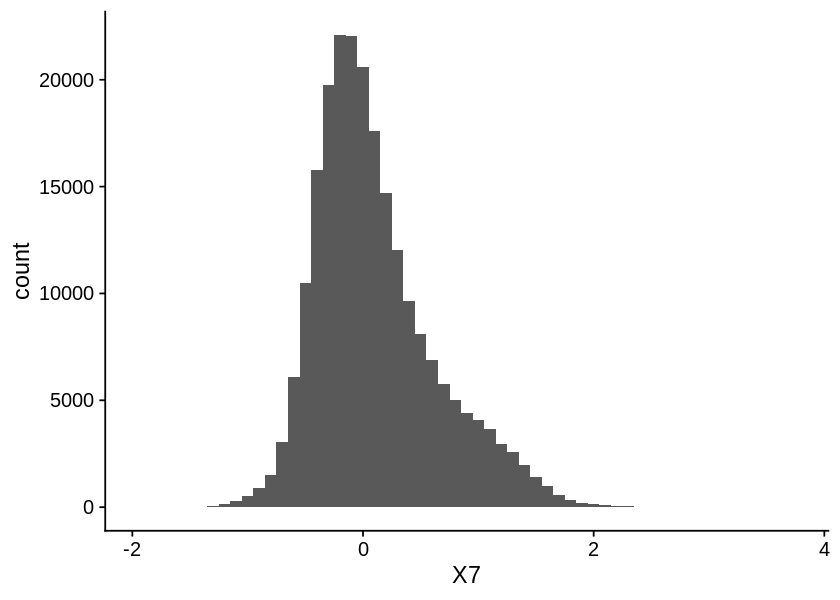

In [9]:
dat = dat_lmpra_import
gpt = ggplot(dat, aes(x=X7)) + 
    geom_histogram(binwidth = 0.1) + 
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

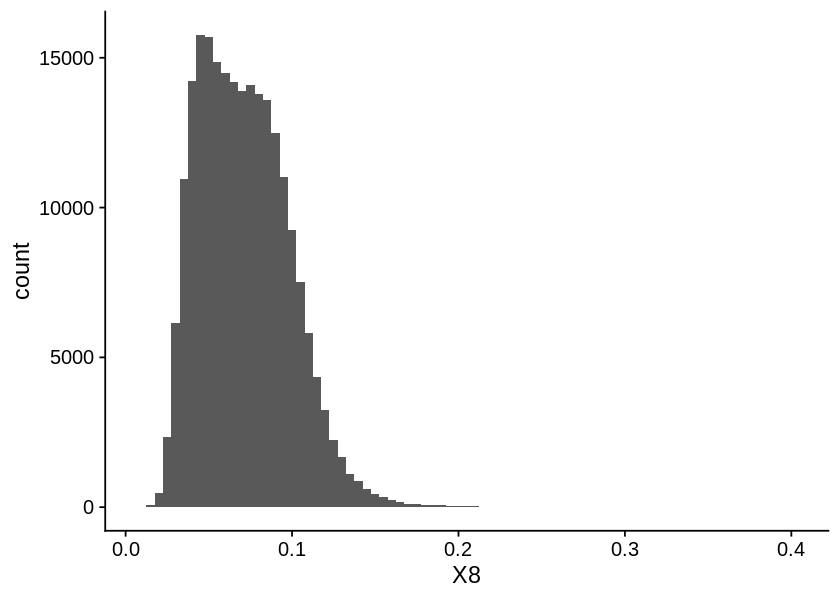

In [15]:
dat = dat_lmpra_import
gpt = ggplot(dat, aes(x=X8)) + 
    geom_histogram(binwidth = 0.005) + 
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

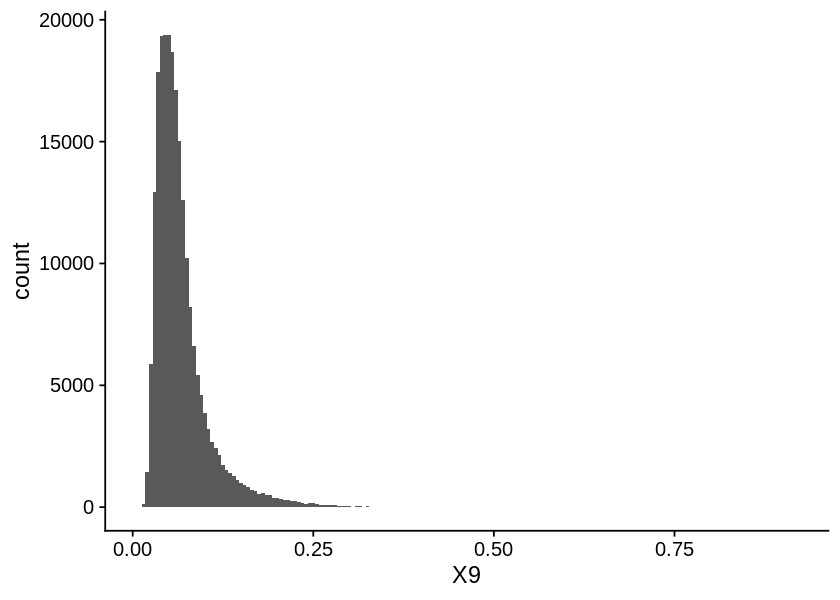

In [16]:
dat = dat_lmpra_import
gpt = ggplot(dat, aes(x=X9)) + 
    geom_histogram(binwidth = 0.005) + 
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

In [40]:
dat = dat_lmpra_import
dat = dat %>% 
    dplyr::group_by(X1, X2, X3) %>%
    dplyr::summarize(Score = mean(X7), .groups="drop")

print(dim(dat))
head(dat)

[1] 114898      4


X1,X2,X3,Score
<chr>,<dbl>,<dbl>,<dbl>
chr1,115631,115831,0.15720
chr1,138940,139140,-0.01350
chr1,203225,203425,0.02735
chr1,267911,268111,0.05975
chr1,586093,586293,0.07640
chr1,629847,630047,-0.48830


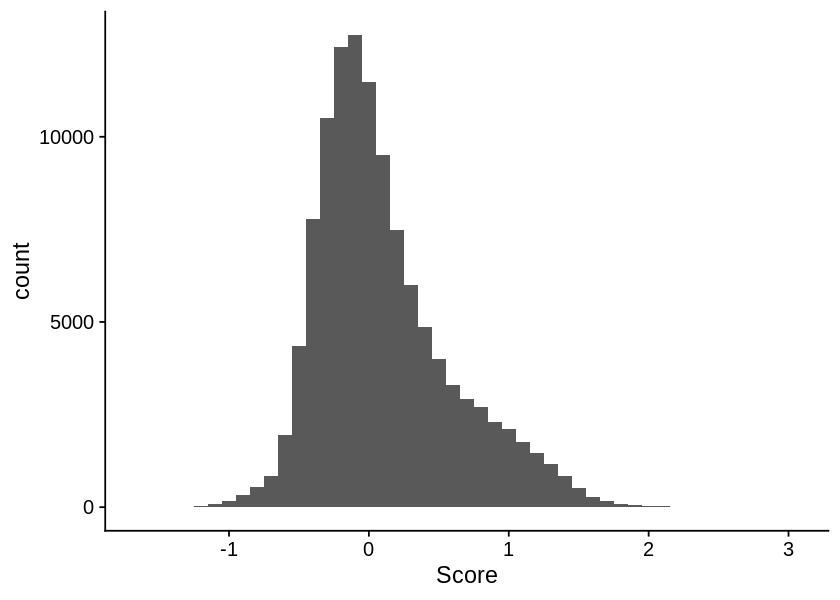

In [39]:
gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(binwidth = 0.1) + 
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

In [45]:
dat1 = dat_lmpra_import
dat2 = dat_lmpra_score
dat  = dplyr::left_join(dat1, dat2, by=c("X4" = "name")) %>% na.omit
print(dim(dat1))
print(dim(dat2))
print(dim(dat))
head(dat)

[1] 226631     11
[1] 226946      2
[1] 226631     12


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,meanVal
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,115631,115831,peak1_Reversed:,0,-,0.1572,0.0780,0.0735,-1,-1,0.1572
chr1,138940,139140,peak2_Reversed:,0,-,0.2047,0.0510,0.0490,-1,-1,0.2047
chr1,138940,139140,peak2,0,+,-0.2317,0.0790,0.0562,-1,-1,-0.2317
chr1,203225,203425,peak3_Reversed:,0,-,0.0023,0.0768,0.0643,-1,-1,0.0023
chr1,203225,203425,peak3,0,+,0.0524,0.0834,0.0721,-1,-1,0.0524
chr1,267911,268111,peak4_Reversed:,0,-,-0.3220,0.0529,0.0352,-1,-1,-0.3220


In [46]:
all(dat$X7 == dat$meanVal)

[1] TRUE